In [43]:
%matplotlib inline
import matplotlib
import csv
matplotlib.style.use('ggplot')
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.cm as cm
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import TweetTokenizer
from nltk.probability import FreqDist
from nltk import word_tokenize
from collections import Counter
from string import punctuation
from sklearn import metrics
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn import cluster
from sklearn.metrics.pairwise import cosine_similarity
matplotlib.rcParams.update({'figure.autolayout': True})

In [94]:
df = pd.read_csv('HC.csv')

In [95]:
df['historia_clinica'] = df['historia_clinica'].str.replace(',','')
df['historia_clinica']= df['historia_clinica'].str.replace(' S. ','sindrome ')
df['historia_clinica'] = df['historia_clinica'].str.replace('.','')
df['historia_clinica'] = df['historia_clinica'].str.replace(r'\n','')#Formato weka

In [96]:
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('años','anos')
df['historia_clinica'] = df['historia_clinica'].str.lower().str.replace('mama','seno')

In [86]:
remove_words = ['paciente','pacientes','gen','secuenciacion','molecular','tipo','mas','de']
pat = r'\b(?:{})\b'.format('|'.join(remove_words))
df['historia_clinica'] = df['historia_clinica'].str.replace(pat,' ')

In [97]:
df['historia_clinica']

0      paciente con cuadro clinico compatible con cri...
1      sospecha craneosinostosis por abombamiento fro...
2      tumor maligno de retina pacientes sin riesgo c...
3      paciente con crisis compulsivas con crisis don...
4      prueba para el complejo de esclerosis tuberosa...
5      sindrome de hipermovilidad miopia degenerativa...
6                                      fibrosis quistica
7      distrofia muscular progresiva en estudio duche...
8      paciente con evidencia de retinoblatoma bilate...
9                   agamaglobulinemia hereditaria bruton
10     sospecha de enfermedad rara con retraso del ne...
11                                     cancer de seno t3
12              estudio molecular de esclerosis tuberosa
13     sospecha de pseudoacondroplasia paciente con a...
14     paciente con antecedentes de enfermedad metabo...
15                           epilepsia mioclonica severa
16     paciente con 2 hijos fallecidos en periodo neo...
17     baja talla por deficienc

In [98]:
df = df.rename(columns={'historia_clinica': 'HC'})

In [99]:
from nltk.corpus import stopwords
stop = stopwords.words('spanish')
q = r'\b(?:{})\b'.format('|'.join(stop).encode('utf-8'))
df['HC'] = df['HC'].str.replace(q,'')

In [100]:
df['HC']

0      paciente  cuadro clinico compatible  crisis fe...
1      sospecha craneosinostosis  abombamiento fronta...
2      tumor maligno  retina pacientes  riesgo cardio...
3      paciente  crisis compulsivas  crisis   suprave...
4      prueba   complejo  esclerosis tuberosa genes t...
5      sindrome  hipermovilidad miopia degenerativa p...
6                                      fibrosis quistica
7      distrofia muscular progresiva  estudio duchene...
8      paciente  evidencia  retinoblatoma bilateral  ...
9                   agamaglobulinemia hereditaria bruton
10     sospecha  enfermedad rara  retraso  neurodesar...
11                                       cancer  seno t3
12                estudio molecular  esclerosis tuberosa
13     sospecha  pseudoacondroplasia paciente  acorta...
14     paciente  antecedentes  enfermedad metabolica ...
15                           epilepsia mioclonica severa
16     paciente  2 hijos fallecidos  periodo neonatal...
17     baja talla  deficiencia 

In [101]:
#from nltk.stem.snowball import SnowballStemmer
#stemmer = SnowballStemmer("spanish")
#df['stimming'] = df.HC.map(lambda x: ' '.join([stemmer.stem(y) for y in x.decode('utf-8').split(' ')]))
#df.stimming.head()

In [102]:
df.head()

,id,codigo,sexo,edad,HC
0,1,32244,M,2,paciente cuadro clinico compatible crisis fe...
1,2,33254,F,0,sospecha craneosinostosis abombamiento fronta...
2,3,36954,F,0,tumor maligno retina pacientes riesgo cardio...
3,4,35227,M,2,paciente crisis compulsivas crisis suprave...
4,5,31156,F,8,prueba complejo esclerosis tuberosa genes t...


In [103]:
df.to_csv('completo.csv', index = False) # Formato wekaaaaaaaaaaaaa

In [104]:
df1 = df[['id','HC']]

In [174]:
df1.head()

,id,HC
0,1,paciente cuadro clinico compatible crisis fe...
1,2,sospecha craneosinostosis abombamiento fronta...
2,3,tumor maligno retina pacientes riesgo cardio...
3,4,paciente crisis compulsivas crisis suprave...
4,5,prueba complejo esclerosis tuberosa genes t...


In [106]:
df1.to_csv('hc1.csv', index = False, encoding='utf-8')

In [14]:
df2 = pd.read_csv('hc1.csv')

In [107]:
top_N = 30

In [108]:
txt = df1.HC.str.lower().str.replace(r'.', ' ').str.cat(sep= ' ')
words = nltk.tokenize.word_tokenize(txt)
word_dist = nltk.FreqDist(words)

In [109]:
stopwords = nltk.corpus.stopwords.words('spanish')+ list(punctuation)
words_except_stop_dist = nltk.FreqDist(w for w in words if w not in stopwords)
rslt = pd.DataFrame(words_except_stop_dist.most_common(top_N),
                    columns=['Términos', 'Frecuencias']).set_index('Términos')
rslt.head()

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  


,Frecuencias
Términos,
paciente,97
seno,64
cancer,60
sindrome,44
sospecha,32


In [110]:
frecuencias = rslt.sort_values(by='Frecuencias',ascending=[True])

In [111]:
frecuencias.head()

,Frecuencias
Términos,
manejo,12
cuadro,13
2,13
baja,14
ovario,14


/home/jennifer/anaconda2/lib/python2.7/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


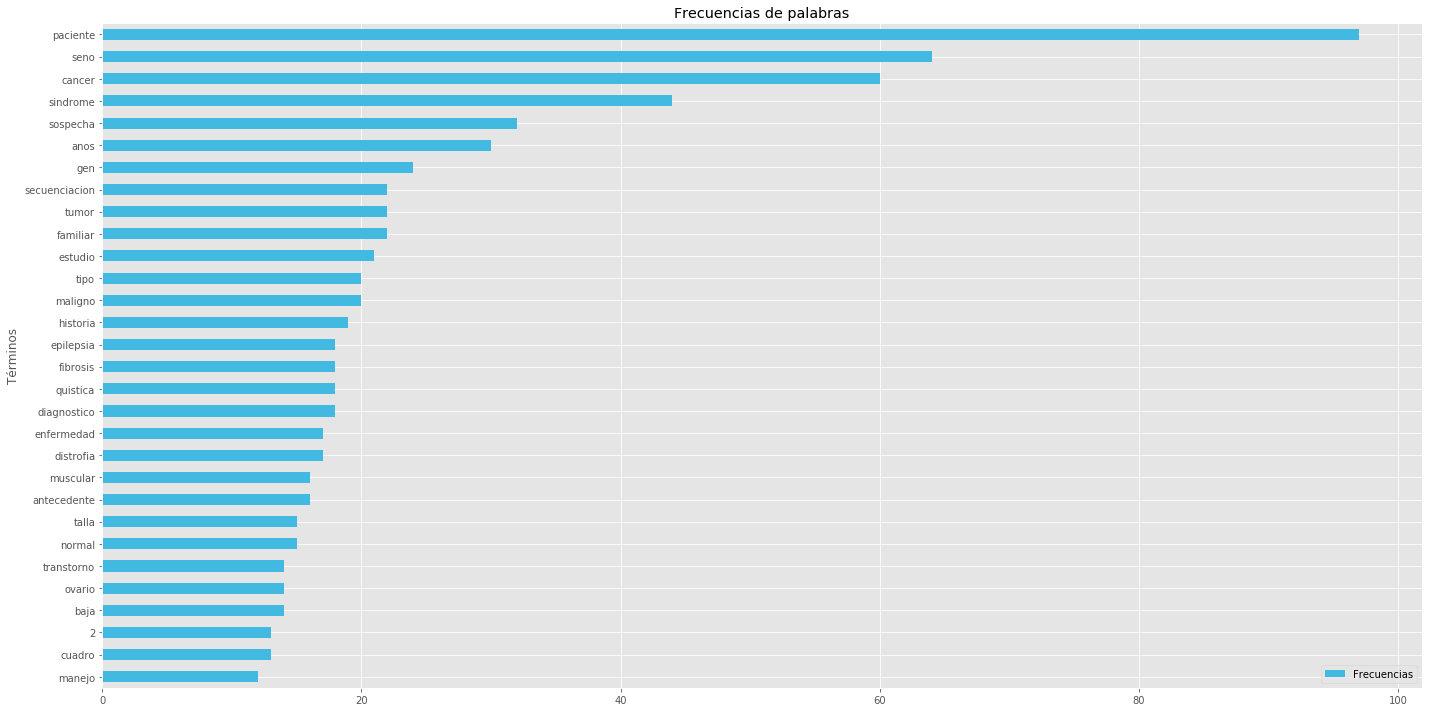

In [112]:
#plt.xkcd()
plot = frecuencias.plot(kind="barh", title = 'Frecuencias de palabras' , color = [('#41b9e1')],figsize=(20, 10));
fig = plot.get_figure();
fig.savefig("frecuecias.png", bbox_inches=0)

In [113]:
idf = pd.read_csv('idffrecuencias1.csv') #calculado con R
del idf['Unnamed: 0']

In [115]:
idf_plot = idf.sum()

In [116]:
idf_plot.head()

canalopatia       13.665780
clinico           45.229816
compatible        27.554810
consentimiento    18.743783
considera         41.966685
dtype: float64

In [117]:
IDF = pd.DataFrame({'Términos':idf_plot.index, 'frecuencias':idf_plot.values})
q = IDF.sort_values(by=['frecuencias'],ascending=[False]).set_index('Términos')
idf_p = q.head(30)
idf_p.head()

,frecuencias
Términos,
seno,168.134194
cancer,160.267675
sindrome,129.863166
anos,100.685753
sospecha,94.996892


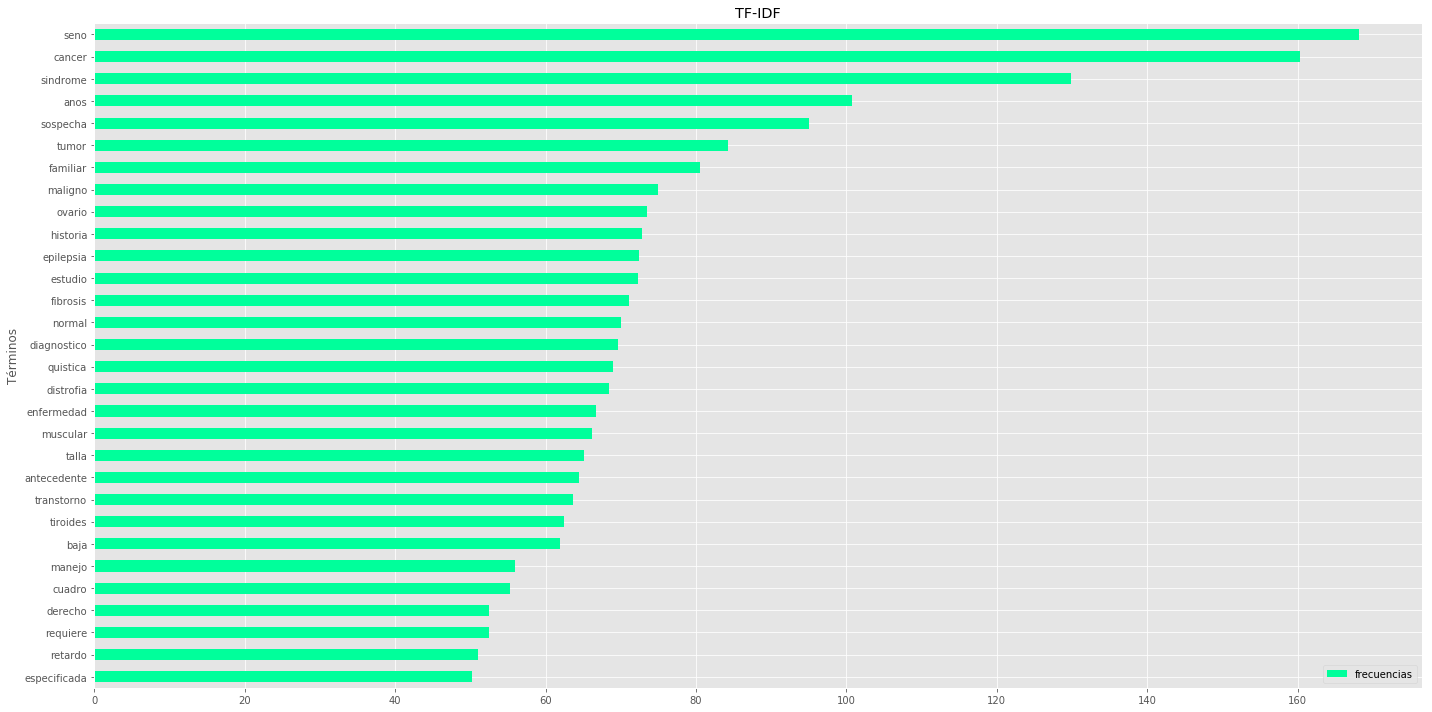

In [118]:
#plt.xkcd()
plot = idf_p.plot(kind="barh", title = 'TF-IDF' , color = [('#00FF9B')],figsize=(20, 10));
fig = plot.get_figure();
plt.gca().invert_yaxis();
fig.savefig("TFIDF1.png",bbox_inches=0)

In [119]:
idf1 = pd.read_csv('idffrecuencias1.csv') #calculado con R

In [120]:
idf1 = idf1.rename(columns={'Unnamed: 0': 'DOC'})
del idf1['DOC']
idf1.head()

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,6.83289,5.025535,5.510962,6.247928,4.662965,5.025535,4.247928,6.83289,6.247928,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.00000,0.000000,0.000000,6.247928,0.000000,0.000000,0.000000,0.00000,0.000000,6.247928,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.00000,0.000000,0.000000,0.000000,0.000000,10.051070,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [121]:
mean_idf = idf1.mean(0)

In [122]:
mean_idf.head()

canalopatia       0.059938
clinico           0.198376
compatible        0.120854
consentimiento    0.082210
considera         0.184064
dtype: float64

In [123]:
resta = idf1 - mean_idf #Normalización entre cero y uno. Distancia de la media


In [124]:
norma = np.sqrt(np.diag(np.dot(idf1.T, idf1))) #calculo de la norma

Se calcula a partir de multiplicar la matriz transpuesta por si misma, esto proporciona una matriz cuadrada cuya diagonal esta formada por las normas al cuadrado, la raiz cuadrada de esta diagonal corresponde al vector de las normas de los campos de la matriz.

In [125]:
normalizado = idf1/norma

In [126]:
normalizado

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
0,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [127]:
normalizado.to_csv('normalizado1.csv', index= True)

In [128]:
comprobacion = np.sqrt(np.diag(np.dot(normalizado.T, normalizado))) # Comprobacion de la normlizacion......
comprobacion

array([ 1.,  1.,  1., ...,  1.,  1.,  1.])

In [129]:
labels = list(range(1, 229))

In [130]:
normalizado['DOC'] = labels

In [131]:
normalizado.set_index('DOC')

,canalopatia,clinico,compatible,consentimiento,considera,crisis,cuadro,dravet,febriles,informado,...,prolapso,raiz,scrore,oesteogenesis,scna1,poliposico,querequirio,quimioterapia,resscion,sigmoide
DOC,,,,,,,,,,,,,,,,,,,,,
1,0.707107,0.27735,0.447214,0.57735,0.333333,0.27735,0.258199,0.707107,0.57735,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.00000,0.000000,0.57735,0.000000,0.00000,0.000000,0.000000,0.00000,0.57735,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.00000,0.000000,0.00000,0.000000,0.55470,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.000000,0.00000,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.00000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [132]:
#matrix = normalizado.as_matrix()
for n_clusters in range(2,11):
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters,n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 2, 'The average silhouette_score is :', 0.61979828557578664)
('For n_clusters =', 3, 'The average silhouette_score is :', 0.57732862815143016)
('For n_clusters =', 4, 'The average silhouette_score is :', 0.55259844755072807)
('For n_clusters =', 5, 'The average silhouette_score is :', 0.53389308724337048)
('For n_clusters =', 6, 'The average silhouette_score is :', 0.51903536007005657)
('For n_clusters =', 7, 'The average silhouette_score is :', 0.50454070219109259)
('For n_clusters =', 8, 'The average silhouette_score is :', 0.49473370412825246)
('For n_clusters =', 9, 'The average silhouette_score is :', 0.48361349643098189)
('For n_clusters =', 10, 'The average silhouette_score is :', 0.46914706287379704)


In [133]:
cluster_range = range(2, 11)
cluster_errors = []
for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit(normalizado)
    cluster_errors.append( clusters.inertia_ )

In [134]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,cluster_errors,num_clusters
0,248658.061033,2
1,111451.407305,3
2,63535.317677,4
3,41198.829931,5
4,29159.620910,6
5,21875.847378,7
6,17149.759926,8
7,13981.434594,9
8,11717.538054,10


In [135]:
clusters_df["cluster_errors"] = clusters_df["cluster_errors"]/10000
clusters_df

,cluster_errors,num_clusters
0,24.865806,2
1,11.145141,3
2,6.353532,4
3,4.119883,5
4,2.915962,6
5,2.187585,7
6,1.714976,8
7,1.398143,9
8,1.171754,10


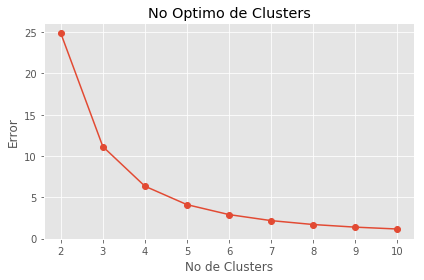

In [136]:
matplotlib.style.use('ggplot')
import matplotlib.pyplot as plt
fig = plt.figure()
plt.ylabel('Error')
plt.xlabel('No de Clusters')
plt.plot(clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o")
plt.title('No Optimo de Clusters')
fig.savefig('Clusters.png', dpi=fig.dpi)

In [137]:
n_clusters = 5
silhouette_avg = -1
while silhouette_avg <  0.5:
    kmeans = KMeans(init='k-means++', n_clusters = n_clusters, n_init=10)
    kmeans.fit(normalizado)
    clusters = kmeans.predict(normalizado)
    silhouette_avg = silhouette_score(normalizado, clusters)
    
    #km = kmodes.KModes(n_clusters = n_clusters, init='Huang', n_init=2, verbose=0
    #clusters = km.fit_predict(matrix)
    #silhouette_avg = silhouette_score(matrix, clusters)
    print("For n_clusters =", n_clusters, "The average silhouette_score is :", silhouette_avg)

('For n_clusters =', 5, 'The average silhouette_score is :', 0.53437406398896703)


In [138]:
cluster_map = pd.DataFrame()
cluster_map['DOC'] = normalizado.index.values
cluster_map['cluster'] = kmeans.labels_
cluster_map['hc'] = df1['HC']
cluster_map

,DOC,cluster,hc
0,0,1,paciente cuadro clinico compatible crisis fe...
1,1,1,sospecha craneosinostosis abombamiento fronta...
2,2,1,tumor maligno retina pacientes riesgo cardio...
3,3,1,paciente crisis compulsivas crisis suprave...
4,4,1,prueba complejo esclerosis tuberosa genes t...
5,5,1,sindrome hipermovilidad miopia degenerativa p...
6,6,1,fibrosis quistica
7,7,1,distrofia muscular progresiva estudio duchene...
8,8,1,paciente evidencia retinoblatoma bilateral ...
9,9,1,agamaglobulinemia hereditaria bruton


In [139]:
cluster1_1 = cluster_map[cluster_map.cluster == 0]
cluster2_1 = cluster_map[cluster_map.cluster == 1]
cluster3_1 = cluster_map[cluster_map.cluster == 2]
cluster4_1 = cluster_map[cluster_map.cluster == 3]
cluster5_1 = cluster_map[cluster_map.cluster == 4]
cluster5_1.head()

,DOC,cluster,hc
94,94,4,gen sn1a canalapatia sodio
95,95,4,displasias esqueleticas
96,96,4,sindrome mielodisplasico recien nacido preterm...
97,97,4,cancer seno familar
98,98,4,epilepsia sindromes epilepticos sintomaticos...


In [ ]:
#cluster_map['hc'] = df1['stimming']
#cluster_map.head()

In [140]:
cluster1 = cluster1_1['DOC'].values.tolist()
c1 = cluster_map[cluster_map['DOC'].isin(cluster1)]
c1.to_csv('cluster1.csv', index = False)
c1.head()

,DOC,cluster,hc
139,139,0,paciente 11 anos producto relacion consangui...
140,140,0,transtorno conducta sociablem transtorno hi...
141,141,0,gastritis cronicatumor maligno seno cancer e...
142,142,0,esclerosis neromuscular distrofia muscular pac...
143,143,0,acidosis tubular renal distal ademas falla me...


In [141]:
cluster2 = cluster2_1['DOC'].values.tolist()
c2 = cluster_map[cluster_map['DOC'].isin(cluster2)]
c2.to_csv('cluster2.csv', index = False)
c2.head()

,DOC,cluster,hc
0,0,1,paciente cuadro clinico compatible crisis fe...
1,1,1,sospecha craneosinostosis abombamiento fronta...
2,2,1,tumor maligno retina pacientes riesgo cardio...
3,3,1,paciente crisis compulsivas crisis suprave...
4,4,1,prueba complejo esclerosis tuberosa genes t...


In [142]:
cluster3 = cluster3_1['DOC'].values.tolist()
c3 = cluster_map[cluster_map['DOC'].isin(cluster3)]
c3.to_csv('cluster3.csv', index = False)
c3.head()

,DOC,cluster,hc
183,183,2,oncopanel seno cancer seno
184,184,2,anemia hipocromatuca microcitica antecendete ...
185,185,2,sindrome ehlers danlos asintomatica habia vi...
186,186,2,secuencion brca1 brca2 delecciones duplicac...
187,187,2,paciente diagnostico clinico homocistinuriad...


In [143]:
cluster4 = cluster4_1['DOC'].values.tolist()
c4 = cluster_map[cluster_map['DOC'].isin(cluster4)]
c4.to_csv('cluster4.csv', index = False )
c4.head()

,DOC,cluster,hc
48,48,3,sospecha paciente enfermedad jarabe arce ...
49,49,3,antecedentes cancer seno 5 hermanas cancer ...
50,50,3,paciente tumor seno derecho carcinoma tipo i...
51,51,3,genex fertilidad
52,52,3,paciente diagnostico distrofia muscular cla...


In [144]:
cluster5 = cluster5_1['DOC'].values.tolist()
c5 = cluster_map[cluster_map['DOC'].isin(cluster5)]
c5.to_csv('cluster5.csv', index = False)
c5.head()

,DOC,cluster,hc
94,94,4,gen sn1a canalapatia sodio
95,95,4,displasias esqueleticas
96,96,4,sindrome mielodisplasico recien nacido preterm...
97,97,4,cancer seno familar
98,98,4,epilepsia sindromes epilepticos sintomaticos...


In [145]:
def graph_component_silhouette(n_clusters, lim_x, mat_size, sample_silhouette_values, clusters):
    plt.rcParams["patch.force_edgecolor"] = True
    plt.style.use('fivethirtyeight')
    mpl.rc('patch', edgecolor = 'dimgray', linewidth=1)
    #____________________________
    fig, ax1 = plt.subplots(1, 1)
    fig.set_size_inches(8, 8)
    ax1.set_xlim([lim_x[0], lim_x[1]])
    ax1.set_ylim([0, mat_size + (n_clusters + 1) * 10])
    y_lower = 10
    for i in range(n_clusters):
        #___________________________________________________________________________________
        # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[clusters == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.spectral(float(i) / n_clusters)        
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values,
                           facecolor=color, edgecolor=color, alpha=0.8)
        #____________________________________________________________________
        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.03, y_lower + 0.5 * size_cluster_i, str(i), color = 'red', fontweight = 'bold',
                bbox=dict(facecolor='white', edgecolor='black', boxstyle='round, pad=0.3'))
        #______________________________________
        # Compute the new y_lower for next plot
        y_lower = y_upper + 10
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

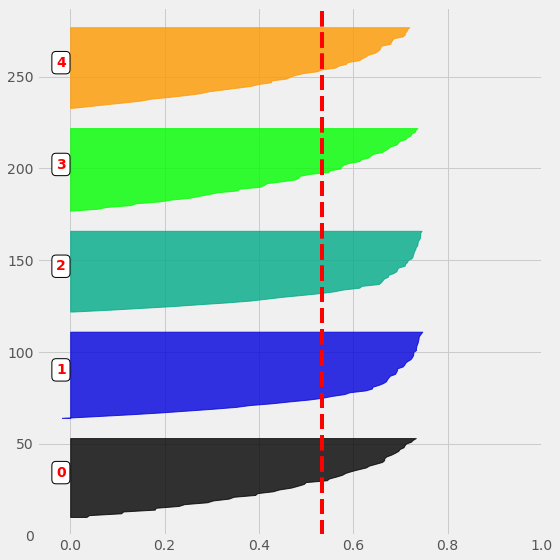

In [146]:
#plt.xkcd()
# define individual silouhette scores
sample_silhouette_values = silhouette_samples(normalizado, clusters)
#__________________
# and do the graph
graph_component_silhouette(n_clusters, [-0.07, 1], len(normalizado), sample_silhouette_values, clusters)

In [147]:
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels, kmeans.labels_))
print("Completeness: %0.3f" % metrics.completeness_score(labels, kmeans.labels_))
print("V-measure: %0.3f" % metrics.v_measure_score(labels, kmeans.labels_))
print("Adjusted Rand-Index: %.3f"
      % metrics.adjusted_rand_score(labels, kmeans.labels_))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(normalizado, kmeans.labels_, sample_size=10000))


Homogeneity: 0.296
Completeness: 1.000
V-measure: 0.457
Adjusted Rand-Index: 0.000
Silhouette Coefficient: 0.534


In [148]:
 frames = [c1,c2,c3,c4,c5]

In [149]:
result = pd.concat(frames)

In [151]:
result.head()

,DOC,cluster,hc
139,139,0,paciente 11 anos producto relacion consangui...
140,140,0,transtorno conducta sociablem transtorno hi...
141,141,0,gastritis cronicatumor maligno seno cancer e...
142,142,0,esclerosis neromuscular distrofia muscular pac...
143,143,0,acidosis tubular renal distal ademas falla me...


In [159]:
df.head()

,id,codigo,sexo,edad,HC
0,1,32244,M,2,paciente cuadro clinico compatible crisis fe...
1,2,33254,F,0,sospecha craneosinostosis abombamiento fronta...
2,3,36954,F,0,tumor maligno retina pacientes riesgo cardio...
3,4,35227,M,2,paciente crisis compulsivas crisis suprave...
4,5,31156,F,8,prueba complejo esclerosis tuberosa genes t...


In [160]:
x = cluster_map[['DOC','cluster']]
y = df[['sexo','edad']]

In [161]:
result = pd.concat([x, y], axis=1)

In [164]:
result.to_csv('weka.csv', index = False)

In [285]:
genes = pd.read_csv('genes.csv')

In [286]:
genes

,id,cromosoma,gen,pos_inicio,pos_fin,ref,alt,referencia_cambioAA,homocigoto,paciente_id,funcion_gen_ref,tipo_variante,clinvar_sig
0,1,chr1,AGRN,979748,979748,A,T,AGRN:exon12:c.A2183T:p.E728V,0,1,exonic,nonsynonymous SNV,non-pathogenic
1,2,chr1,AGRN,981931,981931,A,G,AGRN:exon18:c.A3066G:p.S1022S,1,1,exonic,synonymous SNV,non-pathogenic
2,3,chr1,AGRN,982994,982994,T,C,AGRN:exon21:c.T3558C:p.F1186F,1,1,exonic,synonymous SNV,non-pathogenic
3,4,chr1,"CDK11A,CDK11B",1650845,1650845,G,A,CDK11A:exon4:c.C277T:p.R93W\nCDK11B:exon4:c.C2...,0,1,exonic,nonsynonymous SNV,NaN
4,5,chr1,GABRD,1957037,1957037,T,C,GABRD:exon4:c.T330C:p.G110G,0,1,exonic,synonymous SNV,NaN
5,6,chr1,PEX10,2340200,2340200,T,C,PEX10:exon3:c.A291G:p.T97T,1,1,exonic,synonymous SNV,probable-non-pathogenic
6,7,chr1,MMEL1,2560882,2560882,G,A,MMEL1:exon2:c.C42T:p.A14A,1,1,exonic,synonymous SNV,NaN
7,8,chr1,TP73,3638674,3638674,C,T,TP73:exon3:c.C306T:p.T102T\nTP73:exon3:c.C372T...,1,1,exonic,synonymous SNV,NaN
8,9,chr1,KCNAB2,6158562,6158562,A,G,KCNAB2:exon14:c.A831G:p.S277S\nKCNAB2:exon15:c...,1,1,exonic,synonymous SNV,NaN
9,10,chr1,PLEKHG5,6528589,6528589,C,T,PLEKHG5:exon20:c.G2307A:p.T769T\nPLEKHG5:exon2...,0,1,exonic,synonymous SNV,NaN


In [287]:
genes1 = genes[['paciente_id','cromosoma','gen','homocigoto','tipo_variante','clinvar_sig']]

In [288]:
genes1.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig
0,1,chr1,AGRN,0,nonsynonymous SNV,non-pathogenic
1,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
2,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
3,1,chr1,"CDK11A,CDK11B",0,nonsynonymous SNV,NaN
4,1,chr1,GABRD,0,synonymous SNV,NaN


In [294]:
genes1.to_csv('idgenes.csv', index = False)

In [295]:
r = pd.read_csv('idgenes.csv')
r.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig
0,1,chr1,AGRN,0,nonsynonymous SNV,non-pathogenic
1,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
2,1,chr1,AGRN,1,synonymous SNV,non-pathogenic
3,1,chr1,"CDK11A,CDK11B",0,nonsynonymous SNV,NaN
4,1,chr1,GABRD,0,synonymous SNV,NaN


In [300]:
o = r['paciente_id'].values.tolist()
o1 = df[df['id'].isin(o)]
o

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [301]:
keys = o
values = range(1,228)
dictionary = dict(zip(keys, values))
dictionary

{1: 227}

In [302]:
genes1['paciente_id'].map(dictionary)
genes1['paciente_id'] = genes1['paciente_id'].map(dictionary)

/home/jennifer/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [303]:
P =genes1[genes1.paciente_id == 1]
P.head()

,paciente_id,cromosoma,gen,homocigoto,tipo_variante,clinvar_sig


In [284]:
P.to_csv('paciente1.csv', index = False)

In [282]:
genes1.to_csv('weka1.csv', index = False)

cromosoma                  
                count unique   top freq
paciente_id                            
1                4029     24  chr1  401

In [84]:
dist = cosine_similarity(normalizado)

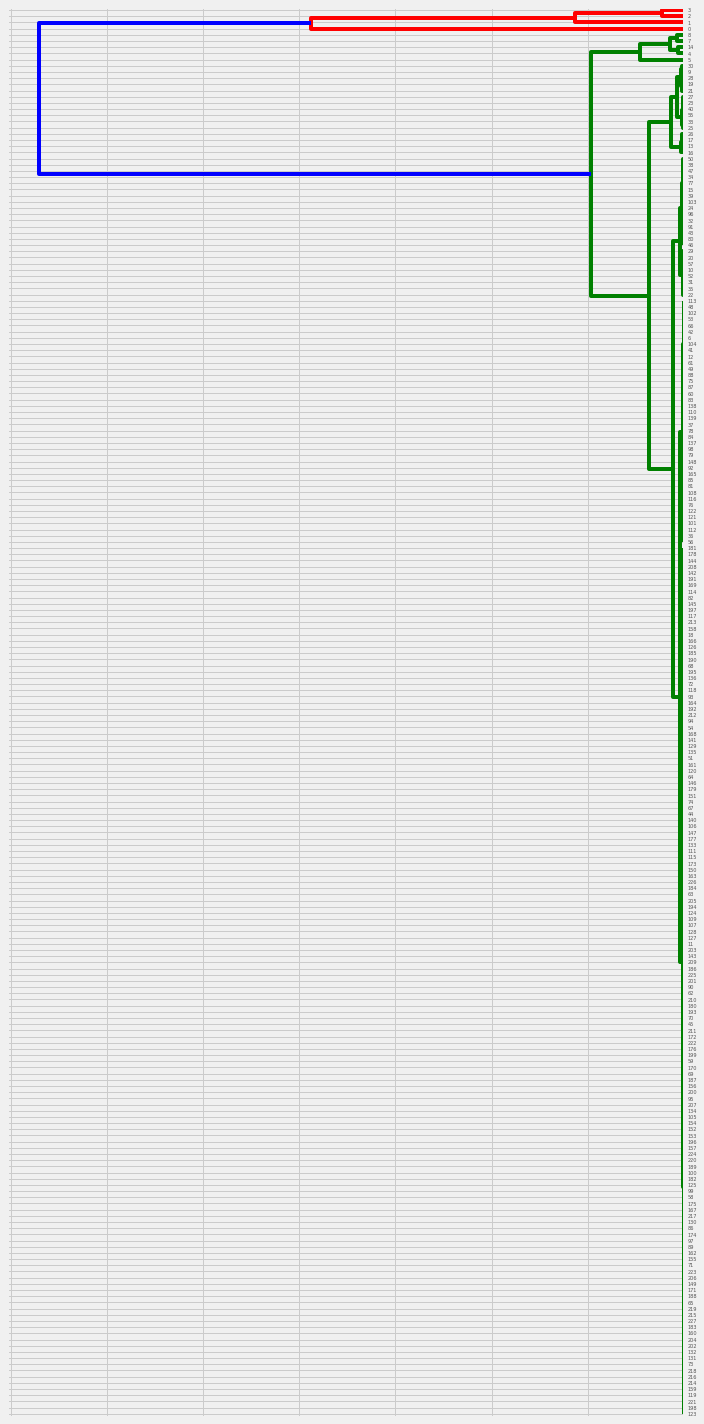

In [85]:
from scipy.cluster.hierarchy import ward, dendrogram
dist = cosine_similarity(normalizado)
linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances\n",
fig, ax = plt.subplots(figsize=(10, 20)) # set size\n",
ax = dendrogram(linkage_matrix, orientation="left");
plt.tick_params(axis= 'x',          # changes apply to the x-axis\n",
                which='both',      # both major and minor ticks are affected\n",
                bottom='off',      # ticks along the bottom edge are off\n",
                top='off',         # ticks along the top edge are off\n",
                labelbottom='off'),
plt.tight_layout() #show plot with tight layout\n",
plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters"